**Little questions that I would have asked if we had an oral exam:**
(meaning that you shouldn't read or google or think for more than 5 seconds to answer them)

 - How do you create markdown cell in Jupyter? (with keyboard commands)
 - How do you add a cell above the current one in Jupyter (with keyboard command)? 
 - What does it mean that variables are dynamically typed in python?
 - What's the difference between python and Fortran integers?
 - Explain the difference between lists, sets and tuples in python.
 - What does negative index mean when accessing list elements?
 - How do you print the first N elements of a list?
 - How do you print every Nth element of a list?
 - How do you print the reverse list?
 - Give an example of a list comprehension.
 - Give an example of cell and line magic commands in Jupyter.
 - What are keyword function arguments in python and what is their advantage?
 - Why shouldn't you do from numpy import *?
 - What is the advantage of using numpy arrays over lists? What are the dangers?
 - What's the purpose of __str__ method in a python class?
 - What package can you use in python for symbolic calculations?



### **Problem1:**

Write a function that calculates the first N [Fibonacci numbers](https://en.wikipedia.org/wiki/Fibonacci_number).

In [6]:
def fibonacci(n):
  a=[1,1]
  while len(a)<n:
    a.append(a[-1]+a[-2])
  return a
fibonacci(7)
    

[1, 1, 2, 3, 5, 8, 13]

### **Problem2:**

Generate random data for 2D points coordinates. Write a function that plots them with different colors for each 90 degree section with the origin in the center. This problem should be coded as a class, i.e. you should be able to execute the code:

```
pr=Problem2()
pr.generate()
pr.display()
```

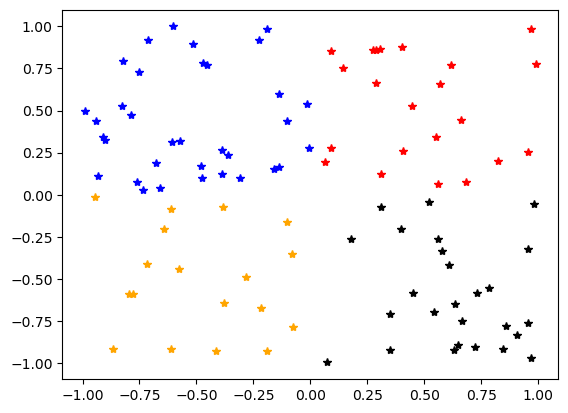

In [28]:
import numpy as np
import matplotlib.pyplot as plt
class Problem2():
  def generate(self):
    self.b=np.array([np.random.rand(2)*2-1 for i in range(100)])
    return b
  def display(self):
    for i in self.b:
      if i[0]>0 and i[1]>0:
        plt.plot(i[0],i[1],marker="*",color='red')
      elif i[0]<0 and i[1]>0:
        plt.plot(i[0],i[1],marker="*",color='blue')
      elif i[0]<0 and i[1]<0:
        plt.plot(i[0],i[1],marker="*",color='orange')
      elif i[0]>0 and i[1]<0:
        plt.plot(i[0],i[1],marker="*",color='black')

pr = Problem2()
pr.generate()
pr.display()


### **Problem3:**

Write a decorator that calls a function twice.

In [1]:
def check(func):
    def change(*args, **kwargs):
      func(*args, **kwargs)
      func(*args, **kwargs)
    return change

@check
def my_f():
  print('Allowed')
my_f()

Allowed
Allowed


### **Problem4:**

Use sympy to solve the equation `d^2y(x)/dx^2 + 9y(x)+x=0`
Check that it's correct (still using sympy). Hint: you can access the right hand side of solution expression with `.rhs`.

Then set the constants equal to 1 and integrate the obtained function numerically using scipy over the interval [0,10]
Hint: you can use symply's lambdify function to turn sympy's expression into a function you can use later for scipy.


In [2]:

from sympy import *
x = Symbol('x')
y = Function('y')

sol = dsolve(Eq(Derivative(y(x), x, x) + 9*y(x) + x, 0))
print(sol)

# y(x) = C1*sin(3*x) + C2*cos(3*x) - x/9

func = lambdify(x, sol.rhs.subs({'C1':1, 'C2':1}), 'numpy')

import numpy as np
from scipy import integrate

x_vals = np.linspace(0, 10, 100)

I = integrate.quad(func, 0, 10)

print(I)


Eq(y(x), C1*sin(3*x) + C2*cos(3*x) - x/9)
(-5.602983246882369, 1.1617657301485302e-13)


### **Problem5:**
(advanced, would be given as a project to do at home and explain at the oral exam)

**Solving Laplace equation by Jacobi method**

The algorithm used in this problem solves Laplace’s equation on an evenly spaced grid through the use of a simple Jacobi iteration technique. The equation is a partial differential equation named after Pierre-Simon Laplace and are important in many grids of science: namely the grids of electromagnetism, astronomy and fluid dynamics. 

The equation has the form: 

```
d^2f/dx^2 + d^2f/dy^2=0
```

**The Algorithm (implement this as a class)**

 - create a numpy array to store 2 dimensional grid.

 -  Setup the initial constant boundary conditions in the following way:
     - the value at the lower left hand corner of the of the grid is 100, 
     - the value ascending and to the right is set to a linear gradient reaching zero at the opposite corners (see Figure1). The rest of the borders are fixed at zero. Please note, that these boundaries remain constant throughout the simulation.

 - Setup the initial condition of the inner grid elements as 0.5.

-  Write a jacobi method. At each iteration, the value of each inner matrix element needs to be recomputed from elements of the current iteration (in a similar way to how we did with game of life). The updating formula, based on numerical computation of second derivatives, is:

```
new_grid[i,j]=0.25*(grid[i,j-1]+grid[i,j+1]+grid[i+1,j]+grid[i-1,j])
```

![](jacobiFigure1.jpg)

Use `imshow` to plot the result. There is a `jacobi.gif` file uploaded that shows how the solution looks like. Making gifs in python is troublesome, so just the final picuture would be enough.

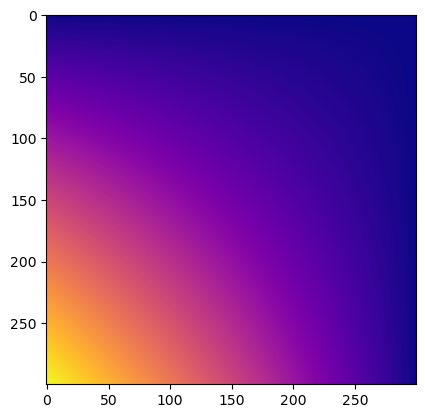

In [138]:
import matplotlib.pyplot as plt
# def check_life(x,y):
#     return x+y
class problem5():

  def create(self,N):
    self.grid = np.zeros((N, N))+0.5
    for i in range(N):
      self.grid[0,i] = 0
      self.grid[i,0] = i*100/(N-1)
      self.grid[N-1,i] = (N-1-i)*100/(N-1)
      self.grid[i,N-1] = 0
    self.new_grid=np.zeros(self.grid.shape)
    # self.check_status=np.vectorize(check_life)
    return self.grid

  def update_grid(self, grid):
    suma=np.zeros(grid.shape)
    suma[1:-1,1:-1] = 0.25*(grid[2:,1:-1]+grid[:-2,1:-1]+grid[1:-1,:-2]+grid[1:-1,2:])
    # self.new_grid=self.check_status(self.grid,self.sum)
    # print(self.sum)
    grid[1:-1,1:-1] = suma[1:-1,1:-1]
    return self.grid
a = problem5()
grid=a.create(300)
n=50000
while n >1 :
  # print(grid[9,1])
  grid = a.update_grid(grid)
  # print(grid[9,1])
  n-=1
plt.imshow(grid, cmap='plasma',vmax=100,vmin=-10)